### Bike Sharing_Vishal Singh

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet as ch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

#### Reading dataset and creating dataframe

Checking encoding format of the file by reading first 10000 bytes using chardet library

In [2]:
with open("D:\AI-ML\Bike Sharing Assignment\day.csv", 'rb') as rawdata:
    result = ch.detect(rawdata.read(10000))
    
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


It shows with 100% confidence that the file read is in 'ascii' format.

Reading file by providing encoding format as "ascii"

In [3]:
df=pd.read_csv('D:\AI-ML\Bike Sharing Assignment\day.csv', encoding='ascii')

Analyzing format, variables of the data provided

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Checking shape of the dataframe

In [5]:
df.shape

(730, 16)

Checking Non-null count and dtype of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### Observations:

*It can be observed that no null values are present in any column

*Except for 'dteday' column all other columns are in numeric format (int or float)

#### Exploring data further and analyzing features

Checking for duplicate entires on the basis of instant column i.e index of entries.
If the entire row content matches along with the index, it will give us an info of duplicate entry made.

In [8]:
df_notdup=df.drop_duplicates(keep='first')
df_notdup.shape

(730, 16)

No duplicate entires are made as shape remains same even after removing duplicates

Dropping variable instant as it is record index and it is not required for model building.

Dropping 'dteday' column which gives us the date as it is very speciific and will not provide a generic insight

Dropping registered and casual column, as we know that casual+registered will give us cnt and and this may lead to multicollinearity because of an already known fact

In [9]:
df=df.drop(['instant','dteday','casual','registered'], axis=1)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


The below mentioned variables are categorical variables but entries are made in numeric format, it may lead to wrong interpretation.
Converting them back to categorical variables as given in data dictionary.
1. season
2. mnth
3. weekday
4. weathersit

Converting season column in correct categorical format

In [11]:
#Sanity check before modifying data
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
df['season']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [13]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

Similarly, converting other 3 columns 'mnth','weekday' & 'weathersit'

'mnth' column

In [14]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [15]:
df['mnth']=df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',
                               5:'May',6:'June',7:'July',8:'Aug',
                               9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

'weekday' column

In [16]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [17]:
df['weekday']=df['weekday'].map({0: 'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df['weekday'].unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

'weathersit' column

In [18]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

Naming weather situation as sit_1, sit_2, sit_3 and sit_4 where,

sit_1: Clear, Few clouds, Partly cloudy, Partly cloudy

sit_2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

sit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

sit_4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [19]:
df['weathersit']=df['weathersit'].map({1:'sit_1',2:'sit_2',3:'sit_3',4:'sit_4'})
df['weathersit'].unique()

array(['sit_2', 'sit_1', 'sit_3'], dtype=object)

In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,sit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,sit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,sit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,sit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,sit_1,9.305237,11.46350,43.6957,12.522300,1600


Converting 3 more columns mentioned below in categroy format only for analyzing purpose.
1. yr
2. holiday
3. workingday

Creating a temporary dataframe 'df_mod' for analyzing as 'df' can be used without converting the above categorical variables to dummy variables again

'yr' column

In [21]:
df_mod=df.copy(deep=True)

In [22]:
df_mod['yr'].unique()

array([0, 1], dtype=int64)

In [23]:
df_mod['yr']=df_mod['yr'].map({0:2018,1:2019})
df_mod['yr'].unique()

array([2018, 2019], dtype=int64)

'holiday' column

In [24]:
df_mod['holiday'].unique()

array([0, 1], dtype=int64)

In [25]:
df_mod['holiday']=df_mod['holiday'].map({1:'yes',0:'no'})
df_mod['holiday'].unique()

array(['no', 'yes'], dtype=object)

'workingday' column

In [26]:
df_mod['workingday'].unique()

array([0, 1], dtype=int64)

In [27]:
df_mod['workingday']=df_mod['workingday'].map({1:'yes',0:'no'})
df_mod['workingday'].unique()

array(['no', 'yes'], dtype=object)

#### Visualizing Data

###### Visualing Numeric Variables

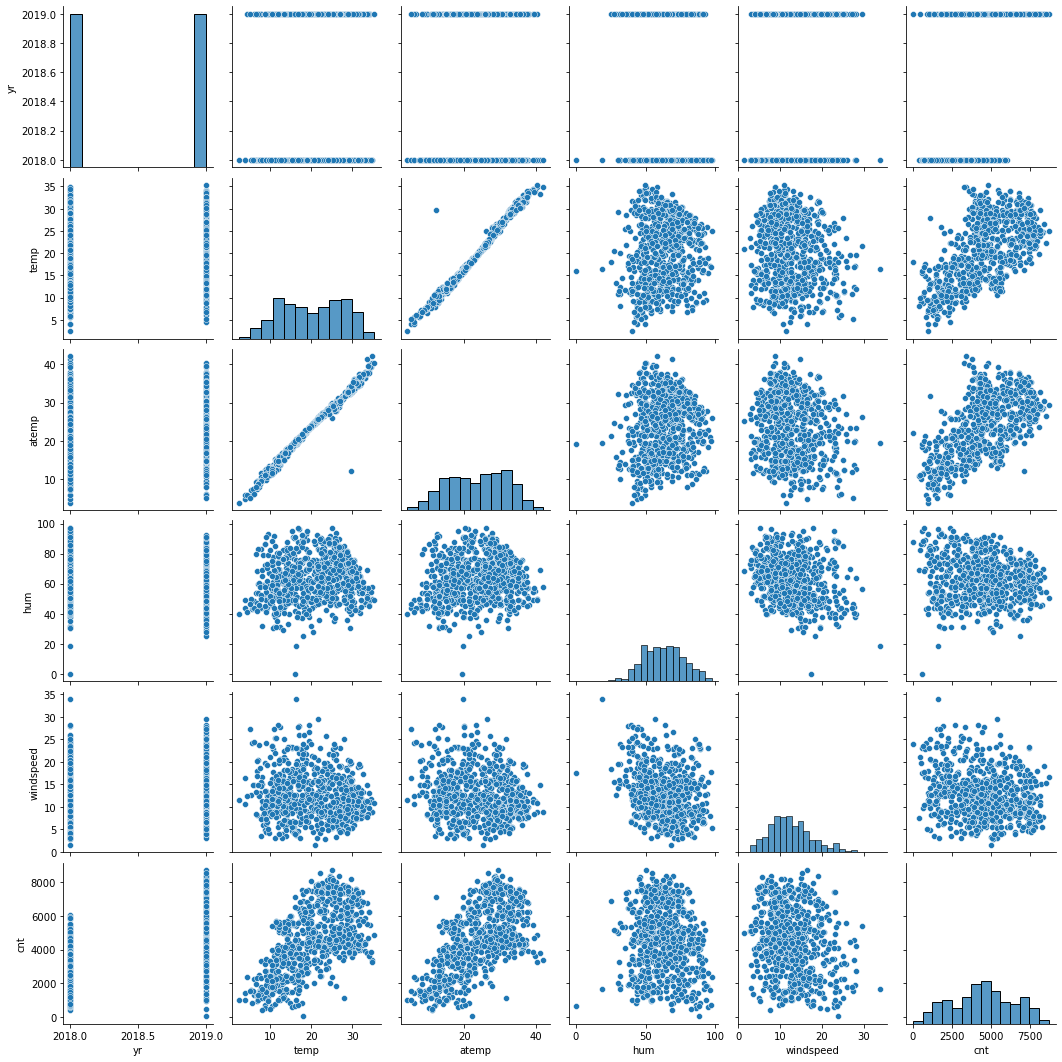

In [28]:
sns.pairplot(df_mod)
plt.show()

It can be observed from the above graph that target variable 'cnt' is somewhat linearly realted to variables such as 'temp','atemp' and some other variables. Therefore, linear regression method can be utilized for model building

###### Visualing categorical variables

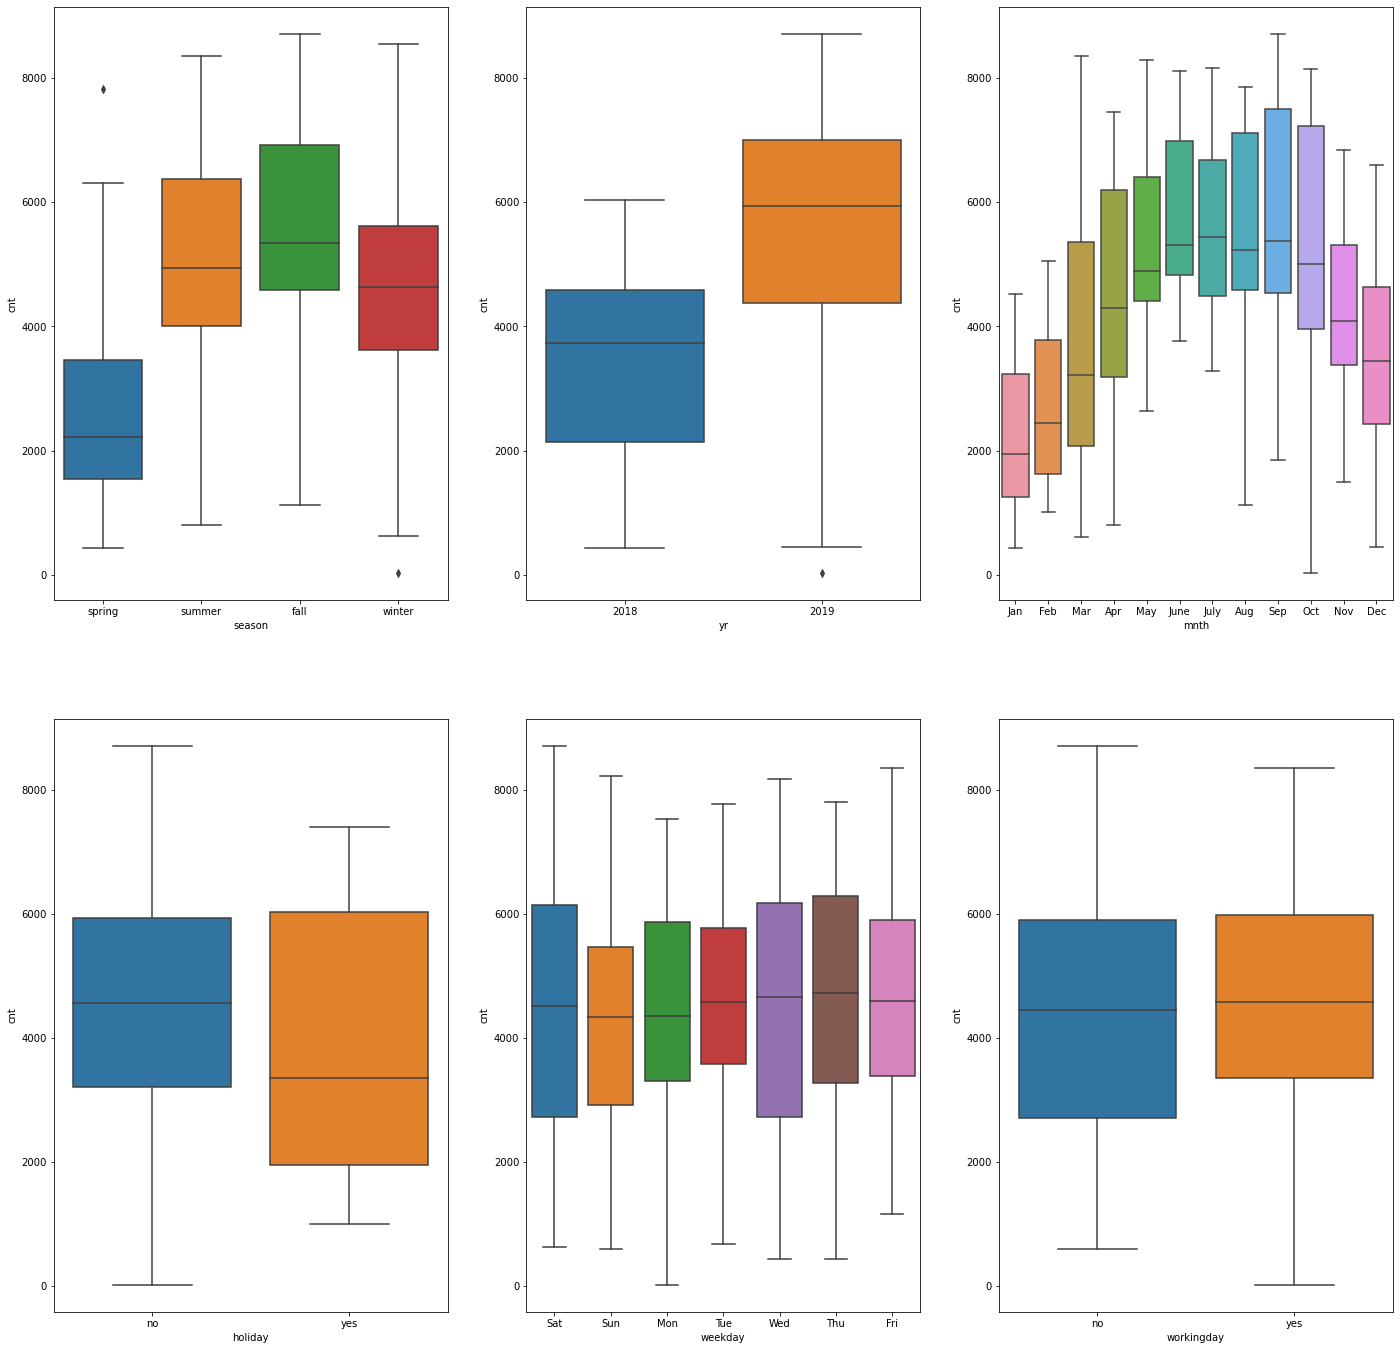

In [29]:
plt.figure(figsize=(24,24))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_mod)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data= df_mod)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_mod)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_mod)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_mod)
plt.subplot(2,3,6)
sns.boxplot(x= 'workingday', y='cnt', data= df_mod)
plt.show()

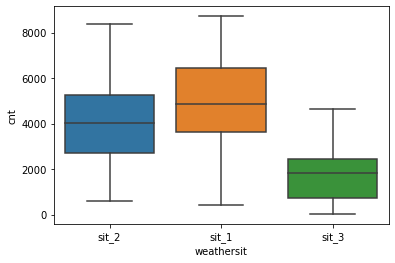

In [30]:
sns.boxplot(x= 'weathersit', y='cnt', data= df_mod)
plt.show()

Observations
1. The average count of bikes is being booked in the following manner season-wise:
•	Fall
•	Summer
•	Winter
•	Spring
2. Average number of bikes booked in 2019 is more as compared to 2018 and the difference is significant.
3. Starting from January month where average number of bikes booked is the least, the average booking increases till the month of July and then decreases till the month of Dec.
4. Average number of bikes booked are more when it is not holiday
5. Average number of bikes booked throughout the week remains almost similar with Saturday & Thursday recording the highest.
6. Average number of bikes booked when it is working day is almost similar.
7. Average count of bikes booked are more when it is clear or partly cloudy as compared to days when it is rainy and snowfall.

### Data Preparation

We will use data frame 'df' for further analysis where columns 'yr', 'holiday' and 'workingday' are not converted and they already have dummy variables 

In [31]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,sit_2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,sit_2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,sit_1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,sit_1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,sit_1,9.305237,11.46350,43.6957,12.522300,1600


##### Dummy variables

Columns such as 'season', 'mnth', 'weekday' and 'weathersit' are categorical variables and it requires to be converted them to various integer levels for model building

'season' column

In [32]:
season_d=pd.get_dummies(df['season'])
season_d.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


For above seasons, if any variable is true for a particular entry its value will be 1 and for other variables it will be 0, we go ahead and drop 1 variable. In case all are 0's it is known that the dropped variable is true.

Here, we can drop `fall` column, as season can be identified with just three columns-
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [33]:
season_d = pd.get_dummies(df['season'], drop_first = True)
season_d.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Similarly, creating dummy variables for 'mnth', 'weekday' and 'weathersit' columns

In [34]:
mnth_d=pd.get_dummies(df['mnth'],drop_first=True)
mnth_d.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [35]:
weekday_d=pd.get_dummies(df['weekday'],drop_first=True)
weekday_d.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [36]:
weathersit_d=pd.get_dummies(df['weathersit'], drop_first=True)
weathersit_d.head()

,sit_2,sit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


###### Note: There is no weather situation 4 recorded in dataframe as mentioned in data dictionary, so dataframe wil be analyzed only for 3 werather situations that is sit_1, sit_2 and sit_3 out of which sit_1 is dropped while creating dummy variables.

Concatenating dummy variables created with original dataframe df for the above 4 columns, naming new dataframe as df_new

In [37]:
df_new = pd.concat([df,season_d,mnth_d,weekday_d,weathersit_d], axis = 1)
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,sit_2,sit_3
0,spring,0,Jan,0,Sat,0,sit_2,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,Jan,0,Sun,0,sit_2,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,Jan,0,Mon,1,sit_1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,sit_1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,sit_1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


Dropping columns from df_new dataframe for which dummy variables are created

In [38]:
df_newm=df_new.drop(['season','mnth','weekday','weathersit'],axis=1)
df_newm.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,sit_2,sit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting data into training and testing sets

splitting data in 70, 30 ratio with training set being 70% as more data is required for training the model

In [39]:
np.random.seed(0) #test and train datasets always have the same rows, respectively
df_train, df_test = train_test_split(df_newm, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the features

To obtaing consistent comparable scales.

Rescaling features using min-max scaler as it takes care of the outliers and the dummy variables

In [40]:
scaler= MinMaxScaler()

Applying min-max scaler to below columns mentioned which are not dummy variables
1. temp
2. atemp
3. hum
4. windspeed
5. cnt

In [41]:
min_max_var =['temp','atemp','hum','windspeed','cnt']
df_train[min_max_var] = scaler.fit_transform(df_train[min_max_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,sit_2,sit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


It can be observed that variables are scaled as required

In [42]:
pd.set_option('display.max_columns', 40)
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,sit_2,sit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


it can be observed that min and max values for all columns are at 0 and 1 respectively, so moving with further analysis

Check the correlation coefficients to see which variables are highly correlated

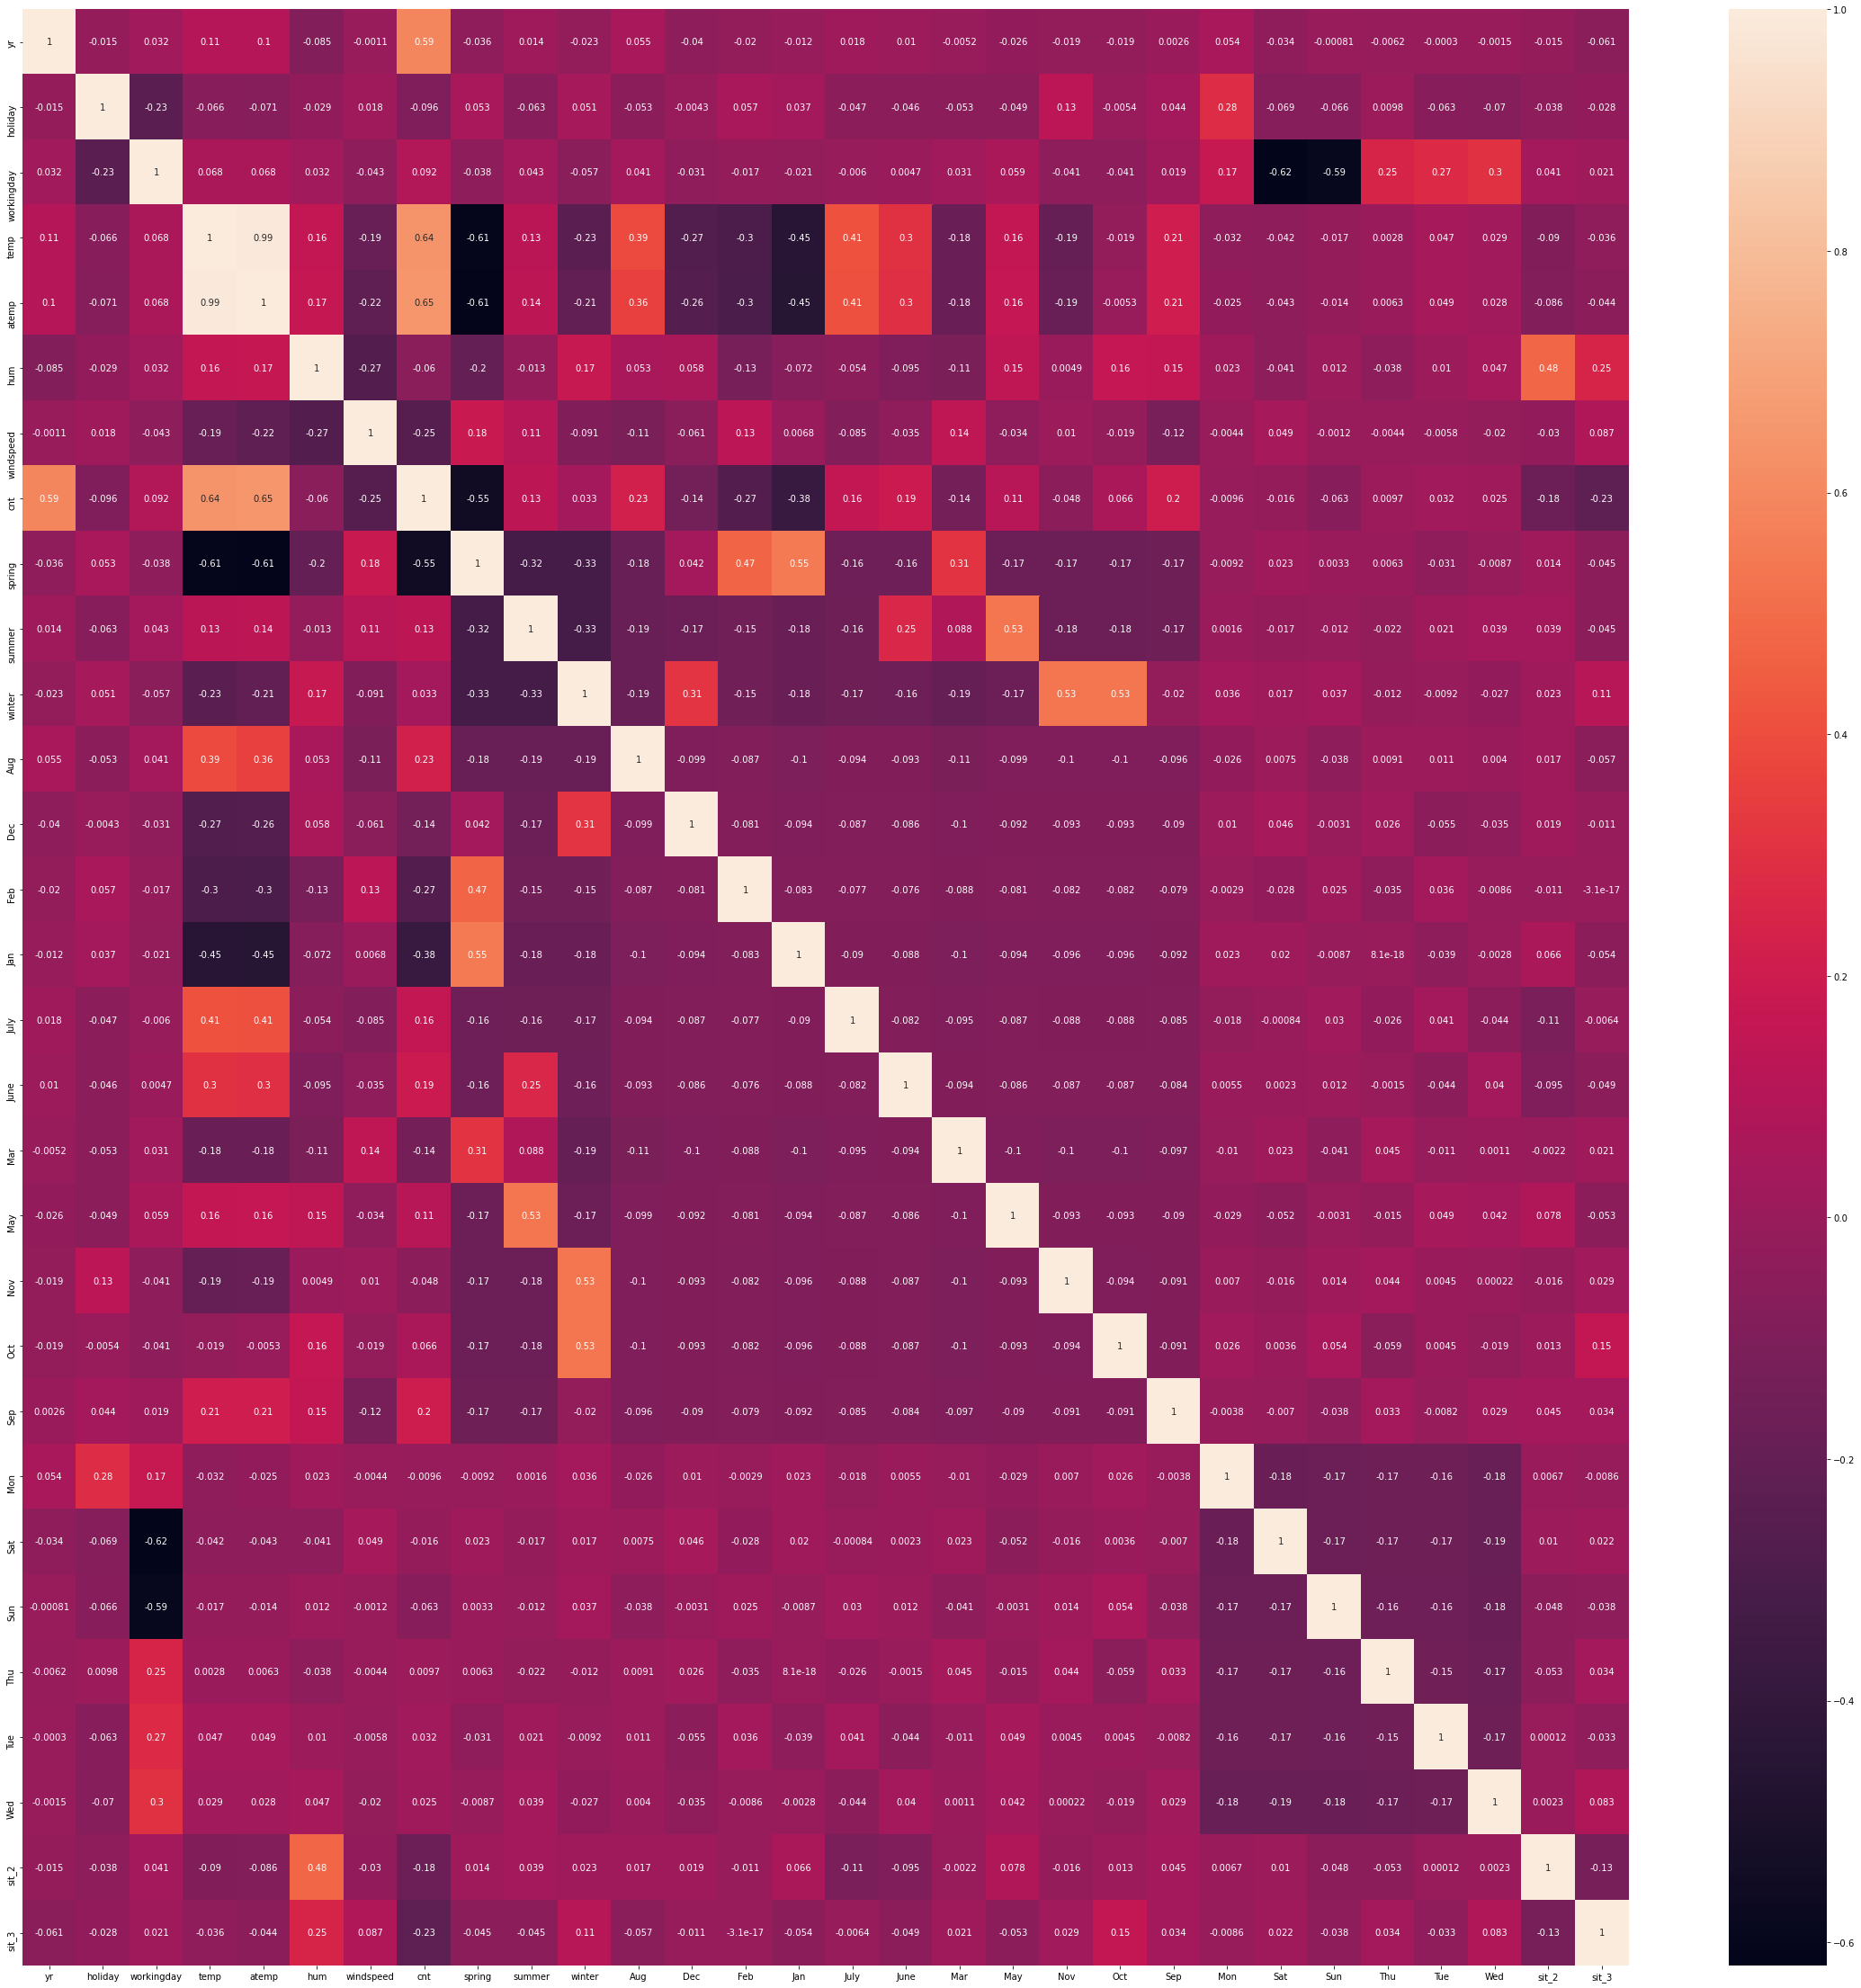

In [43]:
plt.figure(figsize = (40,40))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

Observations- below mentioned variables are correlated
1. hum with sit_2
2. Oct and Nov with winter
3. summer with May
4. spring with Jan & Feb
5. temp with atemp
6. temp and atemp with cnt
7. Sat and Sun with workingday
8. spring with temp and atemp

and some others

#### Buildling a Linear Model

##### Dividing X and Y sets for model building

In [44]:
y_train=df_train.pop('cnt')
X_train=df_train

Taking an automated apporach for coarse selection of variables and manual approach for fine selection of variables

##### RFE:  Recursive Feature Elimination

In [45]:
line = LinearRegression()
line.fit(X_train, y_train)

LinearRegression()

###### Note: Selecting 20 variables for RFE out of 29 variables as selecting more variables is leading to low of Adjusted R-square

In [46]:
rfe = RFE(line, 20)  
rfe = rfe.fit(X_train, y_train)

In [47]:
total_var=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
total_var

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 6),
 ('Mar', False, 7),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', True, 1),
 ('Sun', False, 3),
 ('Thu', False, 8),
 ('Tue', False, 10),
 ('Wed', False, 9),
 ('sit_2', True, 1),
 ('sit_3', True, 1)]

Below features are selected for further analysis

In [48]:
features = X_train.columns[rfe.support_]
features

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'July', 'May', 'Nov',
       'Sep', 'Sat', 'sit_2', 'sit_3'],
      dtype='object')

features ignored

In [49]:
X_train.columns[~rfe.support_]

Index(['Aug', 'June', 'Mar', 'Oct', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

Creating X_train dataframe with RFE selected variables
1. Adding constant for the training model
2. Fitting the model for selected features

In [50]:
X_train_rfe = X_train[features]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.94e-188
Time:                        23:36:37   Log-Likelihood:                 526.26
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -921.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2987      0.038      7.768      0.000       0.223       0.374
yr             0.2317      0.008     29.121      0.000       0.216       0.247
holiday       -0.0489      0.027     -1.816      0.070      -0.102       0.004
workingday     0.0442      0.011      3.865      0.000       0.022       0.067
temp           0.4261      0.133      3.195      0.001       0.164       0.688
atemp          0.0253      0.135      0.187      0.852      -0.240       0.290
hum           -0.1525      0.038     -4.055      0.000      -0.226      -0.079
windspeed     -0.1859      0.026     -7.181      0.000      -0.237      -0.135
spring        -0.0566      0.022     -2.561      0.011      -0.100      -0.013
summer         0.0263      0.017      1.526      0.128      -0.008       0.060
winter         0.1005      0.018      5.564      0.000       0.065       0.136
Dec           -0.0507      0.018     -2.807      0.005      -0.086      -0.015
Feb           -0.0354      0.021     -1.659      0.098      -0.077       0.007
Jan           -0.0657      0.021     -3.100      0.002      -0.107      -0.024
July          -0.0514      0.018     -2.861      0.004      -0.087      -0.016
May            0.0251      0.017      1.453      0.147      -0.009       0.059
Nov           -0.0484      0.019     -2.592      0.010      -0.085      -0.012
Sep            0.0715      0.017      4.298      0.000       0.039       0.104
Sat            0.0547      0.014      3.794      0.000       0.026       0.083
sit_2         -0.0599      0.010     -5.794      0.000      -0.080      -0.040
sit_3         -0.2560      0.026     -9.798      0.000      -0.307      -0.205
==============================================================================
Omnibus:                       84.497   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.277
Skew:                          -0.794   Prob(JB):                     2.46e-53
Kurtosis:                       5.979   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

dropping column `atemp` as it has the highest p value, also it is insignificant as p value > 0.05

In [51]:
X1 = X_train_rfe.drop('atemp',1)

Adding constant and fitting a new model after dropping `atemp` column

In [52]:
X_train1 = sm.add_constant(X1)
lm1 = sm.OLS(y_train, X_train1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.59e-189
Time:                        23:36:37   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2985      0.038      7.774      0.000       0.223       0.374
yr             0.2317      0.008     29.150      0.000       0.216       0.247
holiday       -0.0491      0.027     -1.827      0.068      -0.102       0.004
workingday     0.0442      0.011      3.868      0.000       0.022       0.067
temp           0.4500      0.038     11.796      0.000       0.375       0.525
hum           -0.1521      0.038     -4.055      0.000      -0.226      -0.078
windspeed     -0.1868      0.025     -7.365      0.000      -0.237      -0.137
spring        -0.0560      0.022     -2.563      0.011      -0.099      -0.013
summer         0.0269      0.017      1.593      0.112      -0.006       0.060
winter         0.1012      0.018      5.705      0.000       0.066       0.136
Dec           -0.0506      0.018     -2.807      0.005      -0.086      -0.015
Feb           -0.0355      0.021     -1.661      0.097      -0.077       0.006
Jan           -0.0658      0.021     -3.110      0.002      -0.107      -0.024
July          -0.0512      0.018     -2.858      0.004      -0.086      -0.016
May            0.0250      0.017      1.449      0.148      -0.009       0.059
Nov           -0.0483      0.019     -2.592      0.010      -0.085      -0.012
Sep            0.0718      0.017      4.324      0.000       0.039       0.104
Sat            0.0547      0.014      3.796      0.000       0.026       0.083
sit_2         -0.0599      0.010     -5.807      0.000      -0.080      -0.040
sit_3         -0.2564      0.026     -9.847      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       84.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.321
Skew:                          -0.792   Prob(JB):                     3.96e-53
Kurtosis:                       5.974   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

dropping column `May` as it has the highest p value, also it is insignificant as p value > 0.05

In [53]:
X2 = X_train1.drop('May',1)

Adding constant and fitting a new line after dropping `May` column

In [54]:
X_train2= sm.add_constant(X2)
lm2 = sm.OLS(y_train, X_train2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.55e-190
Time:                        23:36:37   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.038      7.630      0.000       0.213       0.361
yr             0.2311      0.008     29.082      0.000       0.215       0.247
holiday       -0.0499      0.027     -1.857      0.064      -0.103       0.003
workingday     0.0443      0.011      3.878      0.000       0.022       0.067
temp           0.4598      0.038     12.233      0.000       0.386       0.534
hum           -0.1456      0.037     -3.904      0.000      -0.219      -0.072
windspeed     -0.1887      0.025     -7.440      0.000      -0.239      -0.139
spring        -0.0518      0.022     -2.390      0.017      -0.094      -0.009
summer         0.0377      0.015      2.483      0.013       0.008       0.068
winter         0.1035      0.018      5.852      0.000       0.069       0.138
Dec           -0.0491      0.018     -2.727      0.007      -0.085      -0.014
Feb           -0.0339      0.021     -1.591      0.112      -0.076       0.008
Jan           -0.0640      0.021     -3.025      0.003      -0.106      -0.022
July          -0.0517      0.018     -2.883      0.004      -0.087      -0.016
Nov           -0.0465      0.019     -2.499      0.013      -0.083      -0.010
Sep            0.0718      0.017      4.319      0.000       0.039       0.104
Sat            0.0542      0.014      3.761      0.000       0.026       0.083
sit_2         -0.0600      0.010     -5.813      0.000      -0.080      -0.040
sit_3         -0.2583      0.026     -9.924      0.000      -0.309      -0.207
==============================================================================
Omnibus:                       81.478   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.245
Skew:                          -0.787   Prob(JB):                     2.46e-48
Kurtosis:                       5.800   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#dropping column `Feb` as it has the highest p value, also it is insignificant as p value > 0.05
X3 = X_train2.drop('Feb',1)
#Adding constant and fitting a new line after dropping `May` column
X_train3 = sm.add_constant(X3)
lm3 = sm.OLS(y_train, X_train3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          9.55e-191
Time:                        23:36:37   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2759      0.037      7.452      0.000       0.203       0.349
yr             0.2308      0.008     29.005      0.000       0.215       0.246
holiday       -0.0520      0.027     -1.933      0.054      -0.105       0.001
workingday     0.0445      0.011      3.889      0.000       0.022       0.067
temp           0.4750      0.036     13.038      0.000       0.403       0.547
hum           -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed     -0.1876      0.025     -7.388      0.000      -0.237      -0.138
spring        -0.0611      0.021     -2.925      0.004      -0.102      -0.020
summer         0.0409      0.015      2.708      0.007       0.011       0.071
winter         0.1052      0.018      5.949      0.000       0.070       0.140
Dec           -0.0405      0.017     -2.351      0.019      -0.074      -0.007
Jan           -0.0458      0.018     -2.570      0.010      -0.081      -0.011
July          -0.0526      0.018     -2.932      0.004      -0.088      -0.017
Nov           -0.0420      0.018     -2.277      0.023      -0.078      -0.006
Sep            0.0732      0.017      4.404      0.000       0.041       0.106
Sat            0.0550      0.014      3.813      0.000       0.027       0.083
sit_2         -0.0598      0.010     -5.781      0.000      -0.080      -0.039
sit_3         -0.2571      0.026     -9.865      0.000      -0.308      -0.206
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#dropping column `holiday` as it has the highest p value, also it is insignificant as p value > 0.05
X4 = X_train3.drop('holiday',1)
#Adding constant and fitting a new line after dropping `holiday` column
X_train4 = sm.add_constant(X4)
lm4 = sm.OLS(y_train, X_train4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          4.53e-191
Time:                        23:36:37   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.037      7.286      0.000       0.197       0.342
yr             0.2310      0.008     28.956      0.000       0.215       0.247
workingday     0.0522      0.011      4.847      0.000       0.031       0.073
temp           0.4729      0.037     12.953      0.000       0.401       0.545
hum           -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed     -0.1880      0.025     -7.384      0.000      -0.238      -0.138
spring        -0.0628      0.021     -2.999      0.003      -0.104      -0.022
summer         0.0406      0.015      2.683      0.008       0.011       0.070
winter         0.1052      0.018      5.935      0.000       0.070       0.140
Dec           -0.0415      0.017     -2.405      0.017      -0.075      -0.008
Jan           -0.0468      0.018     -2.617      0.009      -0.082      -0.012
July          -0.0516      0.018     -2.870      0.004      -0.087      -0.016
Nov           -0.0462      0.018     -2.517      0.012      -0.082      -0.010
Sep            0.0708      0.017      4.263      0.000       0.038       0.103
Sat            0.0627      0.014      4.513      0.000       0.035       0.090
sit_2         -0.0596      0.010     -5.749      0.000      -0.080      -0.039
sit_3         -0.2568      0.026     -9.826      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Checking multicollineartiy using VIF

In [57]:
vif = pd.DataFrame()
X = X_train4.drop(['const'], axis=1)
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
5,spring,4.50
7,winter,4.11
6,summer,2.86
14,sit_2,2.32
0,yr,2.09
13,Sat,1.86


dropping `hum` column as it has highest VIF value, building a new model as lm5

In [58]:
X5=X_train4.drop('hum',1)
X_train5 = sm.add_constant(X5)
lm5 = sm.OLS(y_train, X_train5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.71e-189
Time:                        23:36:38   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.033      6.084      0.000       0.135       0.264
yr             0.2346      0.008     29.196      0.000       0.219       0.250
workingday     0.0548      0.011      5.027      0.000       0.033       0.076
temp           0.4344      0.036     12.184      0.000       0.364       0.504
windspeed     -0.1610      0.025     -6.479      0.000      -0.210      -0.112
spring        -0.0717      0.021     -3.394      0.001      -0.113      -0.030
summer         0.0338      0.015      2.219      0.027       0.004       0.064
winter         0.0919      0.018      5.209      0.000       0.057       0.127
Dec           -0.0483      0.017     -2.778      0.006      -0.083      -0.014
Jan           -0.0528      0.018     -2.924      0.004      -0.088      -0.017
July          -0.0469      0.018     -2.575      0.010      -0.083      -0.011
Nov           -0.0469      0.019     -2.518      0.012      -0.083      -0.010
Sep            0.0648      0.017      3.859      0.000       0.032       0.098
Sat            0.0671      0.014      4.777      0.000       0.040       0.095
sit_2         -0.0831      0.009     -9.686      0.000      -0.100      -0.066
sit_3         -0.2980      0.024    -12.291      0.000      -0.346      -0.250
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
X = X_train5.drop(['const'], axis=1)
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,spring,3.09
6,winter,3.02
5,summer,2.32
0,yr,2.08
12,Sat,1.86
10,Nov,1.78
8,Jan,1.67


dropping `temp` column as it has value greater than 5, building a new model lm6

In [60]:
X6=X_train5.drop('temp',1)
X_train6 = sm.add_constant(X6)
lm6 = sm.OLS(y_train, X_train6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.05e-162
Time:                        23:36:38   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5460      0.019     29.005      0.000       0.509       0.583
yr             0.2456      0.009     26.999      0.000       0.228       0.263
workingday     0.0562      0.012      4.527      0.000       0.032       0.081
windspeed     -0.1921      0.028     -6.821      0.000      -0.247      -0.137
spring        -0.2487      0.017    -14.246      0.000      -0.283      -0.214
summer        -0.0499      0.016     -3.217      0.001      -0.080      -0.019
winter        -0.0171      0.017     -0.985      0.325      -0.051       0.017
Dec           -0.1132      0.019     -5.996      0.000      -0.150      -0.076
Jan           -0.1221      0.020     -6.251      0.000      -0.161      -0.084
July          -0.0153      0.021     -0.744      0.457      -0.056       0.025
Nov           -0.1054      0.020     -5.144      0.000      -0.146      -0.065
Sep            0.0500      0.019      2.620      0.009       0.012       0.087
Sat            0.0661      0.016      4.129      0.000       0.035       0.098
sit_2         -0.0900      0.010     -9.228      0.000      -0.109      -0.071
sit_3         -0.3180      0.028    -11.539      0.000      -0.372      -0.264
==============================================================================
Omnibus:                       67.584   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.716
Skew:                          -0.666   Prob(JB):                     6.98e-39
Kurtosis:                       5.548   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note: After removing `temp` variable from the model: `winter` and `July` became insignificant according to their p-values. 

Removing variable `July` from the model as it has the highest p-value

In [61]:
X7=X_train6.drop('July',1)
X_train7 = sm.add_constant(X7)
lm7 = sm.OLS(y_train, X_train7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.30e-163
Time:                        23:36:38   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5400      0.017     31.683      0.000       0.507       0.574
yr             0.2457      0.009     27.019      0.000       0.228       0.264
workingday     0.0565      0.012      4.555      0.000       0.032       0.081
windspeed     -0.1920      0.028     -6.820      0.000      -0.247      -0.137
spring        -0.2433      0.016    -15.336      0.000      -0.274      -0.212
summer        -0.0445      0.014     -3.251      0.001      -0.071      -0.018
winter        -0.0123      0.016     -0.763      0.446      -0.044       0.019
Dec           -0.1127      0.019     -5.977      0.000      -0.150      -0.076
Jan           -0.1221      0.020     -6.253      0.000      -0.161      -0.084
Nov           -0.1047      0.020     -5.118      0.000      -0.145      -0.065
Sep            0.0543      0.018      2.997      0.003       0.019       0.090
Sat            0.0662      0.016      4.139      0.000       0.035       0.098
sit_2         -0.0895      0.010     -9.203      0.000      -0.109      -0.070
sit_3         -0.3181      0.028    -11.549      0.000      -0.372      -0.264
==============================================================================
Omnibus:                       67.712   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.384
Skew:                          -0.671   Prob(JB):                     1.36e-38
Kurtosis:                       5.531   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Dropping 'winter' variable as p-value>> 0.05

In [62]:
X8=X_train7.drop('winter',1)
X_train8 = sm.add_constant(X8)
lm8 = sm.OLS(y_train, X_train8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.41e-164
Time:                        23:36:38   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5360      0.016     33.127      0.000       0.504       0.568
yr             0.2457      0.009     27.037      0.000       0.228       0.264
workingday     0.0570      0.012      4.603      0.000       0.033       0.081
windspeed     -0.1926      0.028     -6.849      0.000      -0.248      -0.137
spring        -0.2381      0.014    -16.617      0.000      -0.266      -0.210
summer        -0.0403      0.013     -3.215      0.001      -0.065      -0.016
Dec           -0.1186      0.017     -6.915      0.000      -0.152      -0.085
Jan           -0.1231      0.019     -6.322      0.000      -0.161      -0.085
Nov           -0.1127      0.018     -6.423      0.000      -0.147      -0.078
Sep            0.0558      0.018      3.101      0.002       0.020       0.091
Sat            0.0665      0.016      4.160      0.000       0.035       0.098
sit_2         -0.0901      0.010     -9.305      0.000      -0.109      -0.071
sit_3         -0.3207      0.027    -11.740      0.000      -0.374      -0.267
==============================================================================
Omnibus:                       70.685   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.220
Skew:                          -0.690   Prob(JB):                     2.22e-41
Kurtosis:                       5.628   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
X = X_train8.drop(['const'], axis=1)
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
2,windspeed,3.92
1,workingday,3.20
3,spring,2.38
0,yr,1.87
4,summer,1.77
6,Jan,1.63
9,Sat,1.54
10,sit_2,1.54
7,Nov,1.22
8,Sep,1.20


###### It is observed  that, VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

#### Residual analysis of the training model

###### 1. Checking if the error terms are normally distributed. Plotting a histogram of the error terms

In [64]:
y_train_cnt=lm8.predict(X_train8)

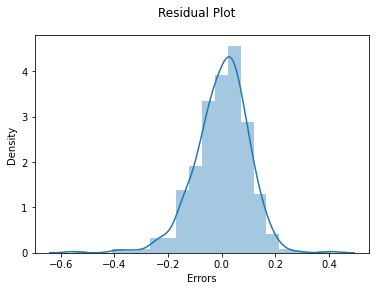

In [65]:
fig = plt.figure()
res=y_train-y_train_cnt
sns.distplot(res, bins = 20)
fig.suptitle('Residual Plot')
plt.xlabel('Errors')
plt.show()

###### It can be observed that the error terms are normally distributed.

###### 2. Residuals must not have any patterns.

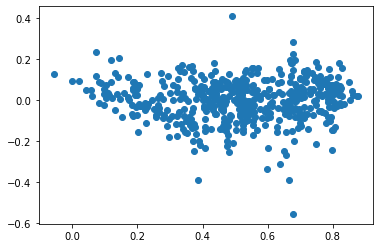

In [66]:
plt.scatter(y_train_cnt,res)
plt.show()

###### No pattern can be obsorved from the above graph

### Predicting and validating the model

###### Making predictions using the final model which is eighth model (lm8)

Scaling features for the test data set

In [67]:
min_max_var =['temp','atemp','hum','windspeed','cnt']
df_test[min_max_var] = scaler.transform(df_test[min_max_var])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,sit_2,sit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing data into X_test and y_test

In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

Adding constant variable to test dataframe

In [69]:
X_test_m8=sm.add_constant(X_test)

Creating `X_test_m8` dataframe by dropping variables from dataframe which is not required

In [70]:
X_test_m8=pd.DataFrame(X_test_m8,columns=['const','yr','workingday','windspeed','spring','summer','Dec','Jan','Nov',
                                'Sep','Sat','sit_2','sit_3'])
X_test_m8.head()

,const,yr,workingday,windspeed,spring,summer,Dec,Jan,Nov,Sep,Sat,sit_2,sit_3
184,1.0,0,0,0.084219,0,0,0,0,0,0,0,1,0
535,1.0,1,1,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,0,0,0,0,0,1,0
221,1.0,0,1,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,1,0,0,0,0,0,0,0


Making predictions using the fifth model

In [71]:
y_pred_m8=lm8.predict(X_test_m8)

#### Model Evaluation

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m8)

0.7832504527952754

 ###### Result: R square score for the above linear regression model when ran on test data set is 78.32% approx.

###### Graph plot for actual vs predicted values

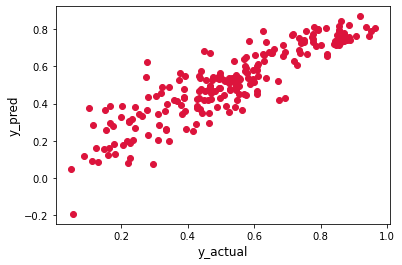

In [73]:
plt.scatter(y_test,y_pred_m8, c='crimson')
fig.suptitle('y-Actual vs y-Predicted', fontsize=15)
plt.xlabel('y_actual', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.show()

The equation of best fitted line for the above model is:

$ cnt = 0.5360 + 0.2457\times yr + 0.0570\times  workingday - 0.1926\times windspeed -0.2381\times spring -0.0403\times summer -0.1186\times Dec - 0.1231\times Jan -0.1127\times Nov +0.0558\times Sep +0.0665\times Sat -0.0901\times sit_2 - 0.3207\times sit_3$

##### Inferences from the equation above:
1. From past data set of 2018 and 2019, it is seen that number of bikes booking has increased and same is considered for prediction.
2. Bikes are being booked more on working days as compared to holidays.
3. Windspeed shows a negative correlation with number of bikes booked.
4. Spring, summer, Dec and Jan shows a negative correlation with number of bikes booked maybe due to weather condition.
5. Sep, Saturday shows a positive correlation with number of bikes booked.
6. Lesser bikes will be booked when weather falls in sit_2 category i.e. Mist+Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist and sit_3 category i.e. Light Snow+Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds